In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

In [30]:
X=digits.data
y=digits.target
y_=np.zeros((y.shape[0],10))

In [13]:
for i in range(y.shape[0]):
    y_[i][y[i]]=1

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [32]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
model=LogisticRegression(solver='saga',
                        max_iter=10000,
                        C=50)

In [36]:
model.fit(X_train,Y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Metrics: Accuracy, Precision, Recall , F1 Score, Confusion matrix 



In [59]:
y_pred=model.predict(X_test)

In [60]:
accuracy_score(y_pred,Y_test)

0.968013468013468

In [45]:
model.score(X_test,Y_test)

0.968013468013468

In [61]:
f1_score(y_pred,Y_test,average='micro')

0.968013468013468

In [67]:
precision_score(y_pred,Y_test,average='micro')

0.968013468013468

In [64]:
cf_matrix = confusion_matrix(Y_test, y_pred)
print(cf_matrix)

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 52  2  0  0  0  0  0  1  0]
 [ 0  0 51  0  0  0  0  0  1  0]
 [ 0  0  1 52  0  1  0  0  2  0]
 [ 0  1  0  0 63  0  0  0  0  0]
 [ 0  1  0  0  0 69  1  0  0  2]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  0  0  0  1  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  2 66]]


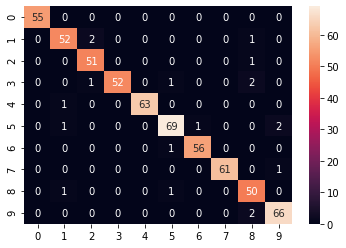

In [65]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)